### Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

In /home/eva/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/eva/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/eva/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/eva/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/eva/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/s

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 12

### EDA

In [3]:
breakfast_data = pd.read_csv("bq-breakfast-data.csv")
breakfast_data['avg_monetary'] = breakfast_data['monetary'] / breakfast_data['frequency']
breakfast_data.head(10)

,user_id,frequency,monetary,avg_monetary
0,110800200,10,24.80,2.480000
1,117795512,7,17.00,2.428571
2,87030528,4,27.90,6.975000
3,113808278,2,4.34,2.170000
4,117942528,6,13.00,2.166667
5,192133628,6,15.10,2.516667
6,94817914,4,15.50,3.875000
7,195246632,4,125.00,31.250000
8,32806832,3,14.88,4.960000
9,192682914,6,33.50,5.583333


In [4]:
breakfast_data.describe()

,user_id,frequency,monetary,avg_monetary
count,1.600000e+04,16000.000000,16000.000000,16000.000000
mean,7.491902e+07,3.198250,16.250056,6.199105
std,5.269644e+07,2.464311,11.579055,4.231598
min,1.539620e+05,1.000000,0.000000,0.000000
25%,3.350516e+07,1.000000,9.300000,3.500000
50%,6.507643e+07,2.000000,13.400000,5.033333
75%,1.044531e+08,4.000000,20.000000,7.521250
max,1.982517e+08,25.000000,272.800000,62.800000


In [5]:
breakfast_data.shape[0]

16000

/home/eva/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/eva/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


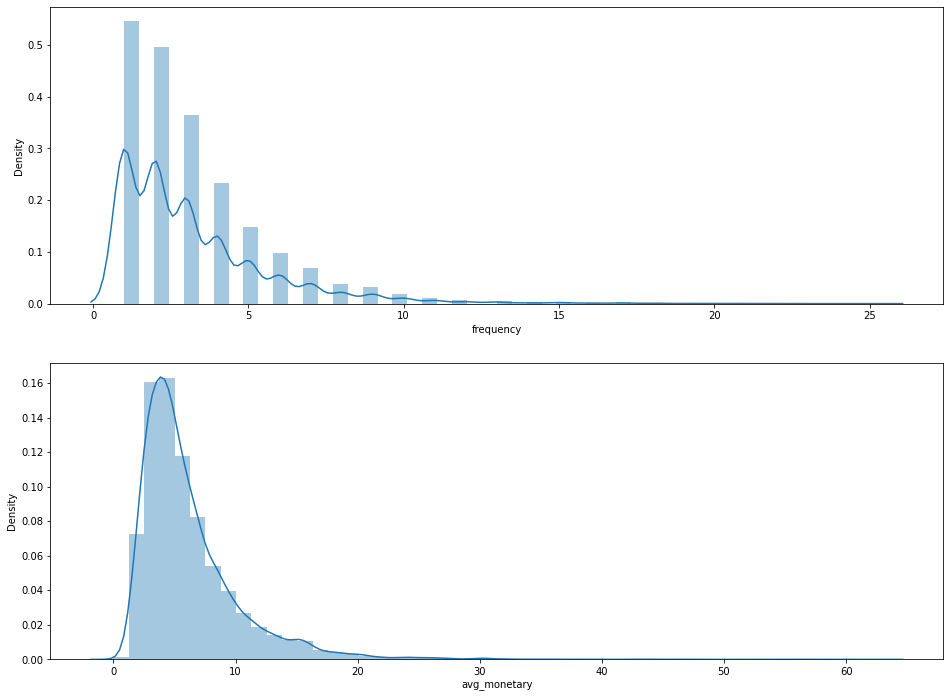

In [6]:
plt.subplot(2, 1, 1);
sns.distplot(breakfast_data['frequency'])
plt.subplot(2, 1, 2);
sns.distplot(breakfast_data['avg_monetary'])
plt.show()

### RFM

In [7]:
def rfm(freq_bins, mon_bins, data):
    labels = range(1, len(freq_bins))
    data['F'] = pd.cut(data['frequency'], bins=freq_bins, labels=labels)
    labels = range(1, len(mon_bins))
    data['M'] = pd.cut(data['avg_monetary'], bins=mon_bins, labels=labels)
    data = data.dropna()
    return data

In [8]:
def get_RFM_tier(row):
    segment = str(row['Concat_Segments'])
    f, m = segment
    f = int(f)
    m = int(m)
    if segment in ['55','45', '54','44']:
        return 'The Best'
    elif f > 3:
        return 'Loyal'
    elif m > 3:
        return 'Big Spender'
    elif f == 3 and m == 3:
        return 'Needs Attention'
    elif f == 3:
        return 'Potential Loyal'
    elif m == 3:
        return 'Potential Big Spender'
    else:
        return 'On diet'

In [9]:
#pd.cut(breakfast_data['avg_monetary'], bins=[0, 5, 10, 15, 30, 63]).value_counts()
#pd.cut(breakfast_data['frequency'], bins=[0, 2, 4, 8, 12, 25]).value_counts()

In [10]:
breakfast_data = rfm([0, 2, 4, 6, 10, 25], [0, 2, 4, 7, 15, 63], breakfast_data)

In [11]:
breakfast_data.head()

,user_id,frequency,monetary,avg_monetary,F,M
0,110800200,10,24.80,2.480000,4,2
1,117795512,7,17.00,2.428571,4,2
2,87030528,4,27.90,6.975000,2,3
3,113808278,2,4.34,2.170000,1,2
4,117942528,6,13.00,2.166667,3,2


In [12]:
def join_rfm(x): 
    return str(int(x['F'])) + str(int(x['M']))

In [13]:
breakfast_data['Concat_Segments'] = breakfast_data.apply(join_rfm, axis=1)
breakfast_data.head(10)

,user_id,frequency,monetary,avg_monetary,F,M,Concat_Segments
0,110800200,10,24.80,2.480000,4,2,42
1,117795512,7,17.00,2.428571,4,2,42
2,87030528,4,27.90,6.975000,2,3,23
3,113808278,2,4.34,2.170000,1,2,12
4,117942528,6,13.00,2.166667,3,2,32
5,192133628,6,15.10,2.516667,3,2,32
6,94817914,4,15.50,3.875000,2,2,22
7,195246632,4,125.00,31.250000,2,5,25
8,32806832,3,14.88,4.960000,2,3,23
9,192682914,6,33.50,5.583333,3,3,33


In [14]:
breakfast_data['Segment'] = breakfast_data.apply(get_RFM_tier, axis=1)
breakfast_data.head(10)

,user_id,frequency,monetary,avg_monetary,F,M,Concat_Segments,Segment
0,110800200,10,24.80,2.480000,4,2,42,Loyal
1,117795512,7,17.00,2.428571,4,2,42,Loyal
2,87030528,4,27.90,6.975000,2,3,23,Potential Big Spender
3,113808278,2,4.34,2.170000,1,2,12,On diet
4,117942528,6,13.00,2.166667,3,2,32,Potential Loyal
5,192133628,6,15.10,2.516667,3,2,32,Potential Loyal
6,94817914,4,15.50,3.875000,2,2,22,On diet
7,195246632,4,125.00,31.250000,2,5,25,Big Spender
8,32806832,3,14.88,4.960000,2,3,23,Potential Big Spender
9,192682914,6,33.50,5.583333,3,3,33,Needs Attention


In [15]:
aggregated_data = breakfast_data[['Segment','user_id']].groupby('Segment').agg({'user_id':'count'})
aggregated_data = aggregated_data.rename({'user_id':'users_count'}, axis='columns')

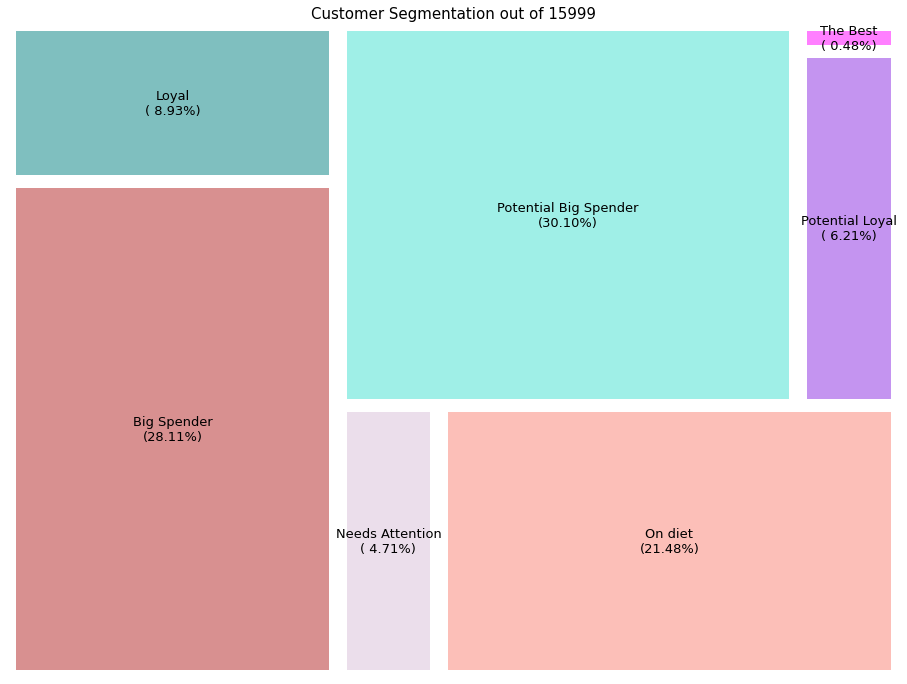

In [17]:
total_users = breakfast_data.shape[0]
labels = [
    f"{segment}\n({row['users_count']/total_users*100:5.2f}%)"
    for segment, row in aggregated_data.iterrows()
]
squarify.plot(aggregated_data['users_count'], 
              label=labels, 
              pad=True,
              alpha=0.5,
              color=['firebrick', 'teal', 'thistle', 'salmon', 'turquoise', 'blueviolet', 'magenta'],
             text_kwargs={'fontsize':13})
plt.title(f'Customer Segmentation out of {total_users}', fontsize=15)
plt.axis('off')
plt.show()

In [18]:
revenue = breakfast_data.groupby("Segment").agg({'monetary':'sum'})
revenue

,monetary
Segment,
Big Spender,80745.21
Loyal,47313.62
Needs Attention,20640.92
On diet,25484.34
Potential Big Spender,64526.67
Potential Loyal,15893.56
The Best,5396.57
